In [4]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px

import datetime as dt

In [5]:
data_path = r'F:\DataSpell\AI-with-jupyter\DATA\Steam_2024_bestRevenue_1500.csv'

In [6]:
data = pl.read_csv(data_path)

In [7]:
data = data.with_columns(
    pl.col('publishers').fill_null('Unknown'),
    pl.col('developers').fill_null('Unknown'),
)

In [8]:
data = data.with_columns(
    pl.col('releaseDate').str.strptime(pl.Date, "%d-%m-%Y"),
)

In [9]:
year_month_day = data.select(
    pl.col('releaseDate').dt.year().alias('year'),
    pl.col('releaseDate').dt.month().alias('month'),
    pl.col('releaseDate').dt.day().alias('day')
)

data.insert_column(2, year_month_day['year'])
data.insert_column(3, year_month_day['month'])
data.insert_column(4, year_month_day['day'])

name,releaseDate,year,month,day,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass,publishers,developers,steamId
str,date,i32,i8,i8,i64,f64,f64,f64,i64,str,str,str,i64
"""WWE 2K24""",2024-03-07,2024,3,7,165301,99.99,8.055097e6,42.36514,71,"""AAA""","""2K""","""Visual Concepts""",2315690
"""EARTH DEFENSE FORCE 6""",2024-07-25,2024,7,25,159806,59.99,7.882151e6,29.651061,57,"""Indie""","""D3PUBLISHER""","""SANDLOT""",2291060
"""Sins of a Solar Empire II""",2024-08-15,2024,8,15,214192,49.99,7.815247e6,12.452593,88,"""Indie""","""Stardock Entertainment""","""Ironclad Games Corporation,Sta…",1575940
"""Legend of Mortal""",2024-06-14,2024,6,14,440998,19.99,7.756399e6,24.797817,76,"""Indie""","""Paras Games,Obb Studio Inc.""","""Obb Studio Inc.""",1859910
"""Shin Megami Tensei V: Vengeanc…",2024-06-13,2024,6,13,141306,59.99,7.629252e6,34.258496,96,"""AA""","""SEGA""","""ATLUS""",1875830
…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Infection Free Zone""",2024-04-11,2024,4,11,452146,24.99,8.73953e6,14.494432,73,"""Indie""","""Games Operators""","""Jutsu Games""",1465460
"""Dark and Darker""",2024-06-07,2024,6,7,2640903,0.0,8.706135e6,31.974027,74,"""Indie""","""IRONMACE""","""IRONMACE""",2016590
"""Songs of Conquest""",2024-05-20,2024,5,20,501474,34.99,8.641459e6,11.891152,88,"""AA""","""Coffee Stain Publishing""","""Lavapotion""",867210


In [10]:
from sklearn.preprocessing import OneHotEncoder

In [11]:
one_hot_encoder = OneHotEncoder()

In [12]:
encoded_publisher_class = one_hot_encoder.fit_transform(data[['publisherClass']].to_numpy())

In [13]:
data = data.to_dummies(columns=['publisherClass'])

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
label_developers = LabelEncoder()
label_publisher = LabelEncoder()

In [16]:
developers_encoded = label_developers.fit_transform(data['developers']).tolist()

In [17]:
publisher_encoded = label_publisher.fit_transform(data['publishers']).tolist()

In [18]:
encoded_data = data.with_columns(
    pl.Series('developers_encoded', developers_encoded),
    pl.Series('publisher_encoded', publisher_encoded)
)

data.insert_column(16, encoded_data['developers_encoded'])
data.insert_column(15, encoded_data['publisher_encoded'])


name,releaseDate,year,month,day,copiesSold,price,revenue,avgPlaytime,reviewScore,publisherClass_AA,publisherClass_AAA,publisherClass_Hobbyist,publisherClass_Indie,publishers,publisher_encoded,developers,developers_encoded,steamId
str,date,i32,i8,i8,i64,f64,f64,f64,i64,u8,u8,u8,u8,str,i64,str,i64,i64
"""WWE 2K24""",2024-03-07,2024,3,7,165301,99.99,8.055097e6,42.36514,71,0,1,0,0,"""2K""",8,"""Visual Concepts""",1225,2315690
"""EARTH DEFENSE FORCE 6""",2024-07-25,2024,7,25,159806,59.99,7.882151e6,29.651061,57,0,0,0,1,"""D3PUBLISHER""",201,"""SANDLOT""",976,2291060
"""Sins of a Solar Empire II""",2024-08-15,2024,8,15,214192,49.99,7.815247e6,12.452593,88,0,0,0,1,"""Stardock Entertainment""",895,"""Ironclad Games Corporation,Sta…",562,1575940
"""Legend of Mortal""",2024-06-14,2024,6,14,440998,19.99,7.756399e6,24.797817,76,0,0,0,1,"""Paras Games,Obb Studio Inc.""",714,"""Obb Studio Inc.""",818,1859910
"""Shin Megami Tensei V: Vengeanc…",2024-06-13,2024,6,13,141306,59.99,7.629252e6,34.258496,96,1,0,0,0,"""SEGA""",819,"""ATLUS""",34,1875830
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Infection Free Zone""",2024-04-11,2024,4,11,452146,24.99,8.73953e6,14.494432,73,0,0,0,1,"""Games Operators""",364,"""Jutsu Games""",586,1465460
"""Dark and Darker""",2024-06-07,2024,6,7,2640903,0.0,8.706135e6,31.974027,74,0,0,0,1,"""IRONMACE""",444,"""IRONMACE""",541,2016590
"""Songs of Conquest""",2024-05-20,2024,5,20,501474,34.99,8.641459e6,11.891152,88,1,0,0,0,"""Coffee Stain Publishing""",177,"""Lavapotion""",641,867210


In [19]:
from sklearn.preprocessing import normalize

In [20]:
columns_to_normalize =['price', 'avgPlaytime']

data_to_normalize = data.select(columns_to_normalize)

normalized_data = normalize(data_to_normalize, axis=0, norm='l2')

normalized_df = pl.DataFrame(
    normalized_data,
    schema=[f"{col}_normalized" for col in columns_to_normalize]
)

# data_normalized = data.hstack(normalized_df)

data.insert_column(9, normalized_df['avgPlaytime_normalized'])
data.insert_column(7, normalized_df['price_normalized'])

name,releaseDate,year,month,day,copiesSold,price,price_normalized,revenue,avgPlaytime,avgPlaytime_normalized,reviewScore,publisherClass_AA,publisherClass_AAA,publisherClass_Hobbyist,publisherClass_Indie,publishers,publisher_encoded,developers,developers_encoded,steamId
str,date,i32,i8,i8,i64,f64,f64,f64,f64,f64,i64,u8,u8,u8,u8,str,i64,str,i64,i64
"""WWE 2K24""",2024-03-07,2024,3,7,165301,99.99,0.119499,8.055097e6,42.36514,0.043875,71,0,1,0,0,"""2K""",8,"""Visual Concepts""",1225,2315690
"""EARTH DEFENSE FORCE 6""",2024-07-25,2024,7,25,159806,59.99,0.071694,7.882151e6,29.651061,0.030708,57,0,0,0,1,"""D3PUBLISHER""",201,"""SANDLOT""",976,2291060
"""Sins of a Solar Empire II""",2024-08-15,2024,8,15,214192,49.99,0.059743,7.815247e6,12.452593,0.012896,88,0,0,0,1,"""Stardock Entertainment""",895,"""Ironclad Games Corporation,Sta…",562,1575940
"""Legend of Mortal""",2024-06-14,2024,6,14,440998,19.99,0.02389,7.756399e6,24.797817,0.025681,76,0,0,0,1,"""Paras Games,Obb Studio Inc.""",714,"""Obb Studio Inc.""",818,1859910
"""Shin Megami Tensei V: Vengeanc…",2024-06-13,2024,6,13,141306,59.99,0.071694,7.629252e6,34.258496,0.035479,96,1,0,0,0,"""SEGA""",819,"""ATLUS""",34,1875830
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Infection Free Zone""",2024-04-11,2024,4,11,452146,24.99,0.029866,8.73953e6,14.494432,0.015011,73,0,0,0,1,"""Games Operators""",364,"""Jutsu Games""",586,1465460
"""Dark and Darker""",2024-06-07,2024,6,7,2640903,0.0,0.0,8.706135e6,31.974027,0.033113,74,0,0,0,1,"""IRONMACE""",444,"""IRONMACE""",541,2016590
"""Songs of Conquest""",2024-05-20,2024,5,20,501474,34.99,0.041817,8.641459e6,11.891152,0.012315,88,1,0,0,0,"""Coffee Stain Publishing""",177,"""Lavapotion""",641,867210


In [21]:
target_variable = 'copiesSold'

exclude_columns = [
    'name',
    'releaseDate',
    'steamId',
    target_variable,
    'price',
    'avgPlaytime',
    'publisher',
    'developers',
]

feature_columns = [col for col in data.columns if col not in exclude_columns]

X = data.select(feature_columns)
y = data[target_variable]

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [24]:
numeric_columns = data.select(
    pl.col(
        pl.Float64, pl.Float32, pl.Int64, pl.Int32, pl.Int16, pl.Int8)
)

In [25]:
numeric_columns.corr()

F:\DataSpell\AI-with-jupyter\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
F:\DataSpell\AI-with-jupyter\venv\Lib\site-packages\numpy\lib\_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


year,month,day,copiesSold,price,price_normalized,revenue,avgPlaytime,avgPlaytime_normalized,reviewScore,publisher_encoded,developers_encoded,steamId
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,1.0,-0.056557,-0.016679,0.040155,0.040155,-0.011155,-0.080362,-0.080362,0.051139,-0.013316,-0.024176,0.151158
NaN,-0.056557,1.0,0.015823,0.024164,0.024164,0.008486,-0.00074,-0.00074,0.033716,0.008592,-0.02784,0.025742
NaN,-0.016679,0.015823,1.0,0.056224,0.056224,0.6277,0.099065,0.099065,0.008584,0.026724,0.005058,-0.056482
NaN,0.040155,0.024164,0.056224,1.0,1.0,0.162521,0.029053,0.029053,-0.035025,-0.07036,-0.062432,-0.266997
…,…,…,…,…,…,…,…,…,…,…,…,…
NaN,-0.080362,-0.00074,0.099065,0.029053,0.029053,0.082426,1.0,1.0,-0.03198,0.012207,-0.004419,-0.118001
NaN,0.051139,0.033716,0.008584,-0.035025,-0.035025,0.007383,-0.03198,-0.03198,1.0,0.046114,0.030074,0.004844
NaN,-0.013316,0.008592,0.026724,-0.07036,-0.07036,-0.002382,0.012207,0.012207,0.046114,1.0,0.576774,0.036899


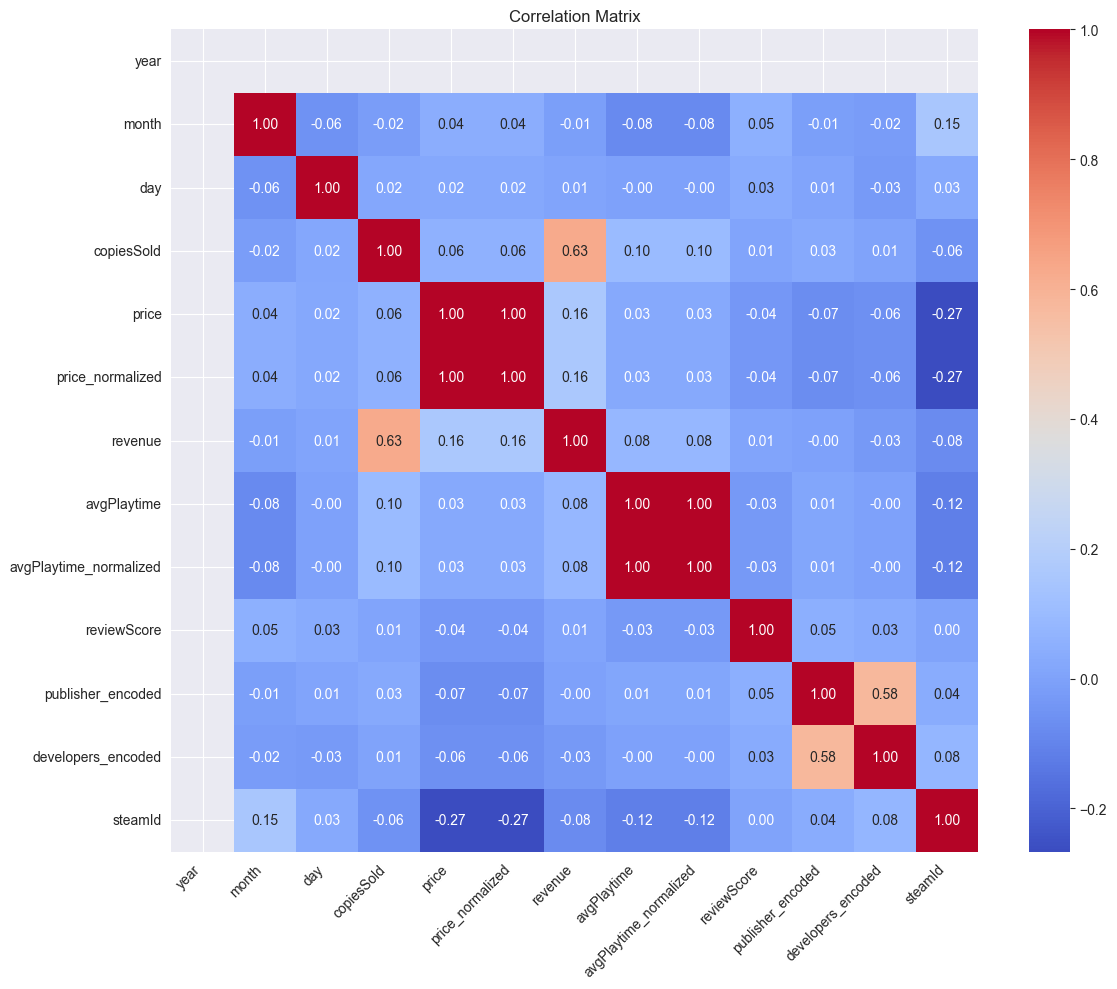

In [29]:
plt.figure(figsize=(12, 10))

sns.heatmap(numeric_columns.to_pandas().corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()

plt.show()

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
features_to_scale = [
    'year',
    'month',
    'day',
    'price',  # Use 'price_normalized' if preferred
    'avgPlaytime',  # Use 'avgPlaytime_normalized' if preferred
    'reviewScore',
    'publisher_encoded',
    'developers_encoded',
    'publisherClass_AA',
    'publisherClass_AAA',
    'publisherClass_Hobbyist',
    'publisherClass_Indie',
    'revenue'  # Include if it's a feature
]

In [32]:
X = data.select(features_to_scale)

In [33]:
scaler = StandardScaler()

In [34]:
X_scaled = scaler.fit_transform(X)

In [35]:
X_scaled_df = pl.DataFrame(
    X_scaled,
    schema=features_to_scale
)

In [36]:
X_scaled_df

year,month,day,price,avgPlaytime,reviewScore,publisher_encoded,developers_encoded,publisherClass_AA,publisherClass_AAA,publisherClass_Hobbyist,publisherClass_Indie,revenue
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0.0,-0.714707,-1.106613,6.523328,1.383908,-0.213947,-1.700819,1.297316,-0.328373,5.276946,-0.025828,-2.55689,0.195055
0.0,1.071316,0.969873,3.35937,0.793516,-0.78981,-1.107528,0.681925,-0.328373,-0.189504,-0.025828,0.3911,0.188834
0.0,1.517822,-0.183731,2.568381,-0.005113,0.485316,1.025857,-0.341254,-0.328373,-0.189504,-0.025828,0.3911,0.186428
0.0,0.62481,-0.299091,0.195413,0.56815,-0.008281,0.469456,0.291436,-0.328373,-0.189504,-0.025828,0.3911,0.184311
0.0,0.62481,-0.414451,3.35937,1.007467,0.81438,0.79223,-1.646179,3.04532,-0.189504,-0.025828,-2.55689,0.179737
…,…,…,…,…,…,…,…,…,…,…,…,…
0.0,-0.268201,-0.645172,0.590908,0.089702,-0.131681,-0.606459,-0.281939,-0.328373,-0.189504,-0.025828,0.3911,0.219674
0.0,0.62481,-1.106613,-1.385775,0.901385,-0.090548,-0.360536,-0.393155,-0.328373,-0.189504,-0.025828,0.3911,0.218473
0.0,0.178305,0.393071,1.381897,-0.031184,0.485316,-1.181306,-0.14601,3.04532,-0.189504,-0.025828,-2.55689,0.216146


In [37]:
data_scaled = data.drop(features_to_scale)
data_scaled = data_scaled.hstack(X_scaled_df)

In [39]:
for col in features_to_scale:
    mean = data_scaled[col].mean()
    std_dev = data_scaled[col].std()
    print(f"Feature: {col}, Mean: {mean:.2f}, Std Dev: {std_dev:.2f}")

Feature: year, Mean: 0.00, Std Dev: 0.00
Feature: month, Mean: 0.00, Std Dev: 1.00
Feature: day, Mean: 0.00, Std Dev: 1.00
Feature: price, Mean: 0.00, Std Dev: 1.00
Feature: avgPlaytime, Mean: -0.00, Std Dev: 1.00
Feature: reviewScore, Mean: -0.00, Std Dev: 1.00
Feature: publisher_encoded, Mean: 0.00, Std Dev: 1.00
Feature: developers_encoded, Mean: 0.00, Std Dev: 1.00
Feature: publisherClass_AA, Mean: 0.00, Std Dev: 1.00
Feature: publisherClass_AAA, Mean: -0.00, Std Dev: 1.00
Feature: publisherClass_Hobbyist, Mean: 0.00, Std Dev: 1.00
Feature: publisherClass_Indie, Mean: 0.00, Std Dev: 1.00
Feature: revenue, Mean: 0.00, Std Dev: 1.00


In [40]:
target_variable = 'copiesSold'

y = data.select(target_variable)

y_np = y.to_numpy().ravel()

X_scaled_np = data_scaled.select(features_to_scale).to_numpy()

In [41]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_np, y_np, test_size=0.2, random_state=42
)

In [ ]:
# next should be this solution 
# 9. Dimensionality Reduction: Use PCA to reduce the dataset to 2 or 3 dimensions and visualize.